**Exercise 4.1**

Explain the code.

**Exercise 4.2**

Modify the coin flipping program in Section 4.5 ```RunningProportion.R``` to simulate a biased coin that has p(H) = 0.8. Change the height of the reference line in the plot to match p(H). Comment your code.

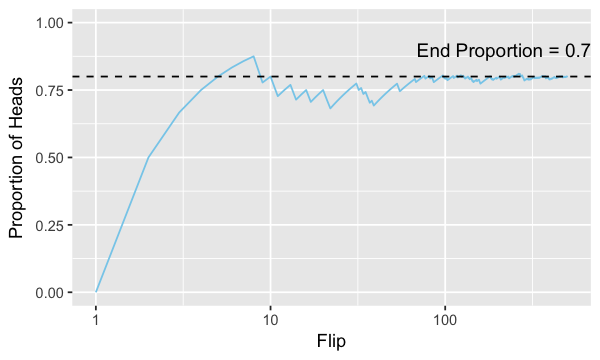

In [39]:
library(ggplot2)
options(repr.plot.width = 5, repr.plot.height = 3)

generate_coin_seq <- function(N, p) {
    return(sample(x = c(0, 1),
                  prob = c(1 - p, p),
                  size = N,
                  replace = TRUE))
}

plot_coin_seq <- function(sequence, ref.line = .5) {
    n <- length(sequence)
    running.prop <- cumsum(sequence) / 1:n
    ggplot(data.frame(prop = running.prop, flip = 1:n),
           aes(x = flip, y = prop)) +
        geom_line(color='skyblue') +
        geom_hline(yintercept = ref.line, lty = 'dashed') +
        scale_x_log10() +
        scale_y_continuous(limits = c(0, 1)) +
        xlab('Flip') +
        ylab('Proportion of Heads') +
        annotate('text', label = paste('End Proportion =', running.prop[n]),
                 x = 250, y = .9, size = 4, color = 'black')
}

# Run this with prob .8
plot_coin_seq(generate_coin_seq(500, .8), ref.line = .8)

**Exercise 4.3**

Compute probabilities of Pinochle.

**Exercise 4.4**

**(A) Adapt the program ```IntegralOfDensity.R``` to plot this density function and approximate its integral. Comment your code. Be careful to consider values of x only in the interval [0, 1].**

[1] "Integral:  0.999897969594939"


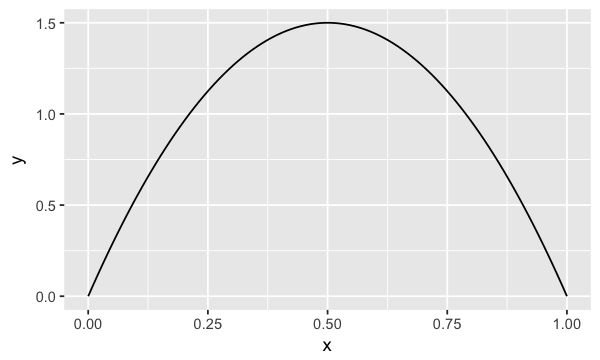

In [61]:
#' Plots the distribution with the given pdf function.
#'
#' @param pdf.fun A callable that returns the density at x
#'
#' @return A plot object
plot_dist <- function(pdf.fun, lims) {
    x <- seq(from = lims[1], to = lims[2], length.out = 100)
    density <- data.frame(x = x, y = pdf.fun(x))
    p <- ggplot(density, aes(x=x, y=y)) +
        geom_line()
    
    print(paste('Integral: ', sum(density$y * abs(x[2] - x[1]))))
    return(p)
}

plot_dist(function(x) 6 * x * (1 - x), lims=c(0, 1))

**(B) Derive the exact integral using calculus.**

The integral of ```6x(1 - x)``` is ```-x^2 (2x - 3)```. Evaluating this at ```[0, 1]``` gives us ```1```.

**(C) From inspecting the graph, what is the maximal value of p(x)?**

The max of p(x) is ```1.5```, which occurs at ```x = 0.5```

**Exercise 4.5**

**(A) Adapt the code from ```IntegralOfDensity.R``` to determine the probability mass under the normal curve from ```x = mu - sigma``` to ```x = mu + sigma```.**

[1] "Integral:  0.68756133046418"


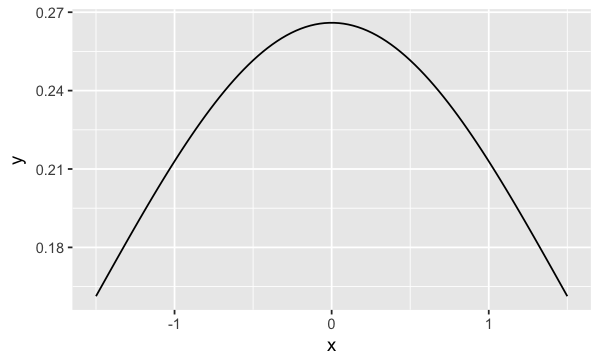

In [66]:
mu <- 0; sigma <- 1.5
plot_dist(function(x) dnorm(x, mean=mu, sd=sigma), lims=mu - c(-1, 1) * sigma)

**(B) Now we use the normal curve to describe the following belief. Suppose you believe that women's heights follow a bell-shaped distribution, centered at 162cm with about two-thirds of all women having heights between 147 and 177cm. What should be the mu and sigma parameter values?**

68% of values on the normal occur between ```mu - sigma``` and ```mu + sigma```. Thus, we are looking for a mean value of ```162``` and sigma of ```(177 - 147) / 2 = 15```.

**Exercise 4.6**

**School children were surveyed regarding their favorite foods. Of the total sample, 20% were 1st graders, 20% were 6th graders, and 60% were 11th graders. For each grade, the following table shows the proportion of respondents that chose each of three foods as their favorite.**

**From that information, construct a table of joint probabilities of grade and favorite food. Also, say whether grade and favorite food are independent or not, and how you ascertained the answer.**

In [81]:
df <- data.frame(grade = c('1st grade', '6th grade', '11th grade'),
                 ice.cream = c(.3, .6, .3),
                 fruit = c(.6, .3, .1),
                 french.fries = c(.1, .1, .6))

# We are given p(grade) and p(food|grade) and want to determine p(grade, food).
# Using Bayes Rule:
#    p(grade, food) = p(food|grade) * p(grade)
# p(grade) = 20% 1st, 20% 6th, 60% 11th
p.grade <- c(.2, .2, .6)
food.cols <- c('ice.cream', 'fruit', 'french.fries')
joint.prob <- cbind(df$grade, df[, food.cols] * p.grade)
joint.prob

df$grade,ice.cream,fruit,french.fries
1st grade,0.06,0.12,0.02
6th grade,0.12,0.06,0.02
11th grade,0.18,0.06,0.36
